In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pld
import seaborn as sns
import optuna
from functools import partial

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.model_selection import LeaveOneOut, RepeatedKFold, LeavePOut, StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score, accuracy_score

In [277]:
X_train, y_train = pd.read_csv('../../Data/titanic_xtrain.csv'), pd.read_csv('../../Data/titanic_ytrain.csv')
X_test, y_test = pd.read_csv('../../Data/titanic_xtest.csv'), pd.read_csv('../../Data/titanic_ytest.csv')

In [278]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]
y_train = y_train.Survived
y_test = y_test.Survived

In [279]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=.1, random_state=42)

In [280]:
X_train2.reset_index(inplace=True, drop=True)
y_train2 = y_train2.reset_index(drop=True)

In [293]:
score_boad = []
def objective(trial, X, y):
    grid_param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000, 10),
        'max_depth': trial.suggest_int('max_depth', 2, 100),
        'max_features': trial.suggest_int('max_features', 1, 40),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'min_samples_split': trial.suggest_int('min_samples_split', 8, 13),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'criterion': trial.suggest_categorical('criterion', ['entropy']),
        'random_state': 42
    }
    #cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
    cv = StratifiedShuffleSplit(n_splits=5, test_size=.30, random_state=42)
    val_scores = []
    y_preds = 0
    for i, (train_idx, test_idx) in enumerate(cv.split(X_train2, y_train2)):
        xtrain, xtest = X_train2.iloc[train_idx, :], X_train2.iloc[test_idx, :]
        ytrain, ytest = y_train2[train_idx], y_train2[test_idx]
        model = RandomForestClassifier(**grid_param).fit(xtrain, ytrain)
        val_score = accuracy_score(ytest, model.predict(xtest))
        val_scores.append(val_score)
        
#         y_pred = model.predict_proba(X_test2)
#         if i == 0:
#             y_preds = y_pred
#         else:
#             y_pred += y_pred
        
    val_score = np.array(val_scores).mean()
    #y_pred = y_preds.argmax(axis=1)
    #test_score = accuracy_score(y_test2, y_pred)
    model = RandomForestClassifier(**grid_param)
    test_score = accuracy_score(y_test2, model.fit(X_train2, y_train2).predict(X_test2))
    
    score_boad.append((val_score, test_score))
    print(f'val score: {val_score}')
    print(f'test score: {test_score}')
    return val_score

In [294]:
optimize = partial(objective, X=X_train, y=y_train)
study = optuna.create_study(direction='maximize')

[I 2021-11-22 00:34:00,948] A new study created in memory with name: no-name-370cf61d-0db5-4848-8b02-22689b414b47


In [296]:
# Opimization
# Recevies the function to be optimized and the number of trials
study.optimize(optimize, n_trials=500)

[I 2021-11-22 00:34:45,704] Trial 5 finished with value: 0.8375 and parameters: {'n_estimators': 50, 'max_depth': 6, 'max_features': 25, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 2 with value: 0.8441666666666666.


val score: 0.8375
test score: 0.8089887640449438


[I 2021-11-22 00:34:46,734] Trial 6 finished with value: 0.8358333333333334 and parameters: {'n_estimators': 90, 'max_depth': 65, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 8, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 2 with value: 0.8441666666666666.


val score: 0.8358333333333334
test score: 0.7865168539325843


[I 2021-11-22 00:34:49,248] Trial 7 finished with value: 0.8341666666666667 and parameters: {'n_estimators': 240, 'max_depth': 37, 'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 9, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 2 with value: 0.8441666666666666.


val score: 0.8341666666666667
test score: 0.7865168539325843


[I 2021-11-22 00:34:59,500] Trial 8 finished with value: 0.8416666666666666 and parameters: {'n_estimators': 740, 'max_depth': 62, 'max_features': 35, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 2 with value: 0.8441666666666666.


val score: 0.8416666666666666
test score: 0.797752808988764


[I 2021-11-22 00:35:02,681] Trial 9 finished with value: 0.8225000000000001 and parameters: {'n_estimators': 200, 'max_depth': 41, 'max_features': 34, 'min_samples_leaf': 4, 'min_samples_split': 8, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 2 with value: 0.8441666666666666.


val score: 0.8225000000000001
test score: 0.797752808988764


[I 2021-11-22 00:35:06,429] Trial 10 finished with value: 0.8283333333333334 and parameters: {'n_estimators': 310, 'max_depth': 91, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 9, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 2 with value: 0.8441666666666666.


val score: 0.8283333333333334
test score: 0.797752808988764


[I 2021-11-22 00:35:15,615] Trial 11 finished with value: 0.8433333333333334 and parameters: {'n_estimators': 580, 'max_depth': 75, 'max_features': 40, 'min_samples_leaf': 4, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 2 with value: 0.8441666666666666.


val score: 0.8433333333333334
test score: 0.8202247191011236


[I 2021-11-22 00:35:23,716] Trial 12 finished with value: 0.8441666666666666 and parameters: {'n_estimators': 550, 'max_depth': 77, 'max_features': 39, 'min_samples_leaf': 4, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 2 with value: 0.8441666666666666.


val score: 0.8441666666666666
test score: 0.8089887640449438


[I 2021-11-22 00:35:35,430] Trial 13 finished with value: 0.8433333333333334 and parameters: {'n_estimators': 980, 'max_depth': 84, 'max_features': 20, 'min_samples_leaf': 4, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 2 with value: 0.8441666666666666.


val score: 0.8433333333333334
test score: 0.797752808988764


[I 2021-11-22 00:35:42,486] Trial 14 finished with value: 0.8416666666666666 and parameters: {'n_estimators': 520, 'max_depth': 73, 'max_features': 30, 'min_samples_leaf': 3, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 2 with value: 0.8441666666666666.


val score: 0.8416666666666666
test score: 0.8089887640449438


[I 2021-11-22 00:35:50,426] Trial 15 finished with value: 0.8466666666666667 and parameters: {'n_estimators': 540, 'max_depth': 42, 'max_features': 40, 'min_samples_leaf': 5, 'min_samples_split': 10, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 15 with value: 0.8466666666666667.


val score: 0.8466666666666667
test score: 0.8089887640449438


[I 2021-11-22 00:36:02,628] Trial 16 finished with value: 0.8416666666666666 and parameters: {'n_estimators': 1000, 'max_depth': 23, 'max_features': 22, 'min_samples_leaf': 5, 'min_samples_split': 10, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 15 with value: 0.8466666666666667.


val score: 0.8416666666666666
test score: 0.797752808988764


[I 2021-11-22 00:36:10,292] Trial 17 finished with value: 0.8408333333333333 and parameters: {'n_estimators': 660, 'max_depth': 44, 'max_features': 18, 'min_samples_leaf': 5, 'min_samples_split': 10, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 15 with value: 0.8466666666666667.


val score: 0.8408333333333333
test score: 0.797752808988764


[I 2021-11-22 00:36:16,414] Trial 18 finished with value: 0.8424999999999999 and parameters: {'n_estimators': 440, 'max_depth': 26, 'max_features': 31, 'min_samples_leaf': 3, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 15 with value: 0.8466666666666667.


val score: 0.8424999999999999
test score: 0.8089887640449438


[I 2021-11-22 00:36:28,135] Trial 19 finished with value: 0.8266666666666668 and parameters: {'n_estimators': 880, 'max_depth': 28, 'max_features': 25, 'min_samples_leaf': 5, 'min_samples_split': 10, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 15 with value: 0.8466666666666667.


val score: 0.8266666666666668
test score: 0.7640449438202247


[I 2021-11-22 00:36:38,334] Trial 20 finished with value: 0.8441666666666666 and parameters: {'n_estimators': 690, 'max_depth': 49, 'max_features': 36, 'min_samples_leaf': 3, 'min_samples_split': 9, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 15 with value: 0.8466666666666667.


val score: 0.8441666666666666
test score: 0.8202247191011236


[I 2021-11-22 00:36:48,997] Trial 21 finished with value: 0.8433333333333334 and parameters: {'n_estimators': 710, 'max_depth': 48, 'max_features': 36, 'min_samples_leaf': 2, 'min_samples_split': 9, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 15 with value: 0.8466666666666667.


val score: 0.8433333333333334
test score: 0.8202247191011236


[I 2021-11-22 00:36:55,744] Trial 22 finished with value: 0.8441666666666666 and parameters: {'n_estimators': 460, 'max_depth': 76, 'max_features': 38, 'min_samples_leaf': 4, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 15 with value: 0.8466666666666667.


val score: 0.8441666666666666
test score: 0.8089887640449438


[I 2021-11-22 00:37:03,346] Trial 23 finished with value: 0.8441666666666666 and parameters: {'n_estimators': 470, 'max_depth': 53, 'max_features': 37, 'min_samples_leaf': 3, 'min_samples_split': 9, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 15 with value: 0.8466666666666667.


val score: 0.8441666666666666
test score: 0.8202247191011236


[I 2021-11-22 00:37:12,739] Trial 24 finished with value: 0.845 and parameters: {'n_estimators': 620, 'max_depth': 34, 'max_features': 40, 'min_samples_leaf': 4, 'min_samples_split': 10, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 15 with value: 0.8466666666666667.


val score: 0.845
test score: 0.8202247191011236


[I 2021-11-22 00:37:18,574] Trial 25 finished with value: 0.8416666666666666 and parameters: {'n_estimators': 420, 'max_depth': 17, 'max_features': 32, 'min_samples_leaf': 4, 'min_samples_split': 10, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 15 with value: 0.8466666666666667.


val score: 0.8416666666666666
test score: 0.797752808988764


[I 2021-11-22 00:37:27,726] Trial 26 finished with value: 0.8433333333333334 and parameters: {'n_estimators': 600, 'max_depth': 35, 'max_features': 40, 'min_samples_leaf': 3, 'min_samples_split': 9, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 15 with value: 0.8466666666666667.


val score: 0.8433333333333334
test score: 0.8202247191011236


[I 2021-11-22 00:37:39,489] Trial 27 finished with value: 0.8275 and parameters: {'n_estimators': 900, 'max_depth': 9, 'max_features': 27, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 15 with value: 0.8466666666666667.


val score: 0.8275
test score: 0.797752808988764


[I 2021-11-22 00:37:44,959] Trial 28 finished with value: 0.8441666666666666 and parameters: {'n_estimators': 390, 'max_depth': 33, 'max_features': 33, 'min_samples_leaf': 4, 'min_samples_split': 10, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 15 with value: 0.8466666666666667.


val score: 0.8441666666666666
test score: 0.8089887640449438


[I 2021-11-22 00:37:50,358] Trial 29 finished with value: 0.8441666666666666 and parameters: {'n_estimators': 380, 'max_depth': 34, 'max_features': 33, 'min_samples_leaf': 4, 'min_samples_split': 10, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 15 with value: 0.8466666666666667.


val score: 0.8441666666666666
test score: 0.8202247191011236


[I 2021-11-22 00:37:58,983] Trial 30 finished with value: 0.8049999999999999 and parameters: {'n_estimators': 510, 'max_depth': 58, 'max_features': 37, 'min_samples_leaf': 3, 'min_samples_split': 9, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 15 with value: 0.8466666666666667.


val score: 0.8049999999999999
test score: 0.7752808988764045


[I 2021-11-22 00:38:09,158] Trial 31 finished with value: 0.8441666666666666 and parameters: {'n_estimators': 780, 'max_depth': 69, 'max_features': 29, 'min_samples_leaf': 5, 'min_samples_split': 13, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 15 with value: 0.8466666666666667.


val score: 0.8441666666666666
test score: 0.797752808988764


[I 2021-11-22 00:38:17,783] Trial 32 finished with value: 0.8433333333333334 and parameters: {'n_estimators': 640, 'max_depth': 17, 'max_features': 29, 'min_samples_leaf': 4, 'min_samples_split': 13, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 15 with value: 0.8466666666666667.


val score: 0.8433333333333334
test score: 0.797752808988764


[I 2021-11-22 00:38:23,580] Trial 33 finished with value: 0.8441666666666666 and parameters: {'n_estimators': 390, 'max_depth': 42, 'max_features': 38, 'min_samples_leaf': 4, 'min_samples_split': 10, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 15 with value: 0.8466666666666667.


val score: 0.8441666666666666
test score: 0.8089887640449438


[I 2021-11-22 00:38:34,921] Trial 34 finished with value: 0.8475000000000001 and parameters: {'n_estimators': 770, 'max_depth': 42, 'max_features': 40, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 34 with value: 0.8475000000000001.


val score: 0.8475000000000001
test score: 0.8089887640449438


[I 2021-11-22 00:38:47,231] Trial 35 finished with value: 0.8416666666666666 and parameters: {'n_estimators': 790, 'max_depth': 50, 'max_features': 40, 'min_samples_leaf': 2, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 34 with value: 0.8475000000000001.


val score: 0.8416666666666666
test score: 0.8202247191011236


[I 2021-11-22 00:38:54,262] Trial 36 finished with value: 0.8474999999999999 and parameters: {'n_estimators': 480, 'max_depth': 55, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 34 with value: 0.8475000000000001.


val score: 0.8474999999999999
test score: 0.797752808988764


[I 2021-11-22 00:39:03,065] Trial 37 finished with value: 0.8416666666666666 and parameters: {'n_estimators': 620, 'max_depth': 53, 'max_features': 35, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 34 with value: 0.8475000000000001.


val score: 0.8416666666666666
test score: 0.797752808988764


[I 2021-11-22 00:39:08,904] Trial 38 finished with value: 0.8383333333333333 and parameters: {'n_estimators': 570, 'max_depth': 58, 'max_features': 12, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 34 with value: 0.8475000000000001.


val score: 0.8383333333333333
test score: 0.7752808988764045


[I 2021-11-22 00:39:20,369] Trial 39 finished with value: 0.8458333333333334 and parameters: {'n_estimators': 760, 'max_depth': 39, 'max_features': 40, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 34 with value: 0.8475000000000001.


val score: 0.8458333333333334
test score: 0.8089887640449438


[I 2021-11-22 00:39:30,843] Trial 40 finished with value: 0.8433333333333334 and parameters: {'n_estimators': 750, 'max_depth': 43, 'max_features': 34, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 34 with value: 0.8475000000000001.


val score: 0.8433333333333334
test score: 0.797752808988764


[I 2021-11-22 00:39:44,618] Trial 41 finished with value: 0.8191666666666666 and parameters: {'n_estimators': 830, 'max_depth': 61, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 34 with value: 0.8475000000000001.


val score: 0.8191666666666666
test score: 0.7752808988764045


[I 2021-11-22 00:39:54,840] Trial 42 finished with value: 0.845 and parameters: {'n_estimators': 680, 'max_depth': 38, 'max_features': 40, 'min_samples_leaf': 5, 'min_samples_split': 10, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 34 with value: 0.8475000000000001.


val score: 0.845
test score: 0.8089887640449438


[I 2021-11-22 00:40:05,645] Trial 43 finished with value: 0.8441666666666666 and parameters: {'n_estimators': 710, 'max_depth': 39, 'max_features': 36, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 34 with value: 0.8475000000000001.


val score: 0.8441666666666666
test score: 0.8202247191011236


[I 2021-11-22 00:40:18,591] Trial 44 finished with value: 0.8483333333333334 and parameters: {'n_estimators': 840, 'max_depth': 29, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8483333333333334
test score: 0.8089887640449438


[I 2021-11-22 00:40:32,291] Trial 45 finished with value: 0.8474999999999999 and parameters: {'n_estimators': 920, 'max_depth': 28, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8474999999999999
test score: 0.8089887640449438


[I 2021-11-22 00:40:46,401] Trial 46 finished with value: 0.8458333333333332 and parameters: {'n_estimators': 930, 'max_depth': 29, 'max_features': 32, 'min_samples_leaf': 1, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8458333333333332
test score: 0.8089887640449438


[I 2021-11-22 00:40:59,704] Trial 47 finished with value: 0.8408333333333333 and parameters: {'n_estimators': 930, 'max_depth': 21, 'max_features': 35, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8408333333333333
test score: 0.797752808988764


[I 2021-11-22 00:41:12,379] Trial 48 finished with value: 0.8483333333333333 and parameters: {'n_estimators': 860, 'max_depth': 46, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8483333333333333
test score: 0.8089887640449438


[I 2021-11-22 00:41:24,493] Trial 49 finished with value: 0.8466666666666667 and parameters: {'n_estimators': 830, 'max_depth': 64, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8466666666666667
test score: 0.8089887640449438


[I 2021-11-22 00:41:32,871] Trial 50 finished with value: 0.7816666666666667 and parameters: {'n_estimators': 970, 'max_depth': 14, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.7816666666666667
test score: 0.797752808988764


[I 2021-11-22 00:41:41,078] Trial 51 finished with value: 0.8300000000000001 and parameters: {'n_estimators': 860, 'max_depth': 45, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8300000000000001
test score: 0.8314606741573034


[I 2021-11-22 00:41:53,009] Trial 52 finished with value: 0.8466666666666667 and parameters: {'n_estimators': 820, 'max_depth': 67, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8466666666666667
test score: 0.8089887640449438


[I 2021-11-22 00:42:04,152] Trial 53 finished with value: 0.8483333333333333 and parameters: {'n_estimators': 800, 'max_depth': 67, 'max_features': 34, 'min_samples_leaf': 5, 'min_samples_split': 13, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8483333333333333
test score: 0.797752808988764


[I 2021-11-22 00:42:17,382] Trial 54 finished with value: 0.8466666666666667 and parameters: {'n_estimators': 940, 'max_depth': 85, 'max_features': 34, 'min_samples_leaf': 5, 'min_samples_split': 13, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8466666666666667
test score: 0.797752808988764


[I 2021-11-22 00:42:29,861] Trial 55 finished with value: 0.8458333333333334 and parameters: {'n_estimators': 890, 'max_depth': 56, 'max_features': 36, 'min_samples_leaf': 5, 'min_samples_split': 13, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8458333333333334
test score: 0.797752808988764


[I 2021-11-22 00:42:40,554] Trial 56 finished with value: 0.8474999999999999 and parameters: {'n_estimators': 790, 'max_depth': 30, 'max_features': 31, 'min_samples_leaf': 5, 'min_samples_split': 13, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8474999999999999
test score: 0.8089887640449438


[I 2021-11-22 00:42:51,011] Trial 57 finished with value: 0.8400000000000001 and parameters: {'n_estimators': 810, 'max_depth': 30, 'max_features': 24, 'min_samples_leaf': 4, 'min_samples_split': 13, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8400000000000001
test score: 0.797752808988764


[I 2021-11-22 00:43:03,718] Trial 58 finished with value: 0.8241666666666667 and parameters: {'n_estimators': 860, 'max_depth': 47, 'max_features': 31, 'min_samples_leaf': 5, 'min_samples_split': 13, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8241666666666667
test score: 0.8089887640449438


[I 2021-11-22 00:43:13,927] Trial 59 finished with value: 0.8391666666666667 and parameters: {'n_estimators': 910, 'max_depth': 99, 'max_features': 15, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8391666666666667
test score: 0.8089887640449438


[I 2021-11-22 00:43:18,200] Trial 60 finished with value: 0.8474999999999999 and parameters: {'n_estimators': 300, 'max_depth': 22, 'max_features': 35, 'min_samples_leaf': 4, 'min_samples_split': 13, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8474999999999999
test score: 0.797752808988764


[I 2021-11-22 00:43:21,159] Trial 61 finished with value: 0.8441666666666666 and parameters: {'n_estimators': 210, 'max_depth': 25, 'max_features': 34, 'min_samples_leaf': 4, 'min_samples_split': 13, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8441666666666666
test score: 0.8089887640449438


[I 2021-11-22 00:43:23,315] Trial 62 finished with value: 0.8433333333333334 and parameters: {'n_estimators': 150, 'max_depth': 20, 'max_features': 36, 'min_samples_leaf': 5, 'min_samples_split': 13, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8433333333333334
test score: 0.7865168539325843


[I 2021-11-22 00:43:26,797] Trial 63 finished with value: 0.8233333333333335 and parameters: {'n_estimators': 340, 'max_depth': 2, 'max_features': 32, 'min_samples_leaf': 4, 'min_samples_split': 13, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8233333333333335
test score: 0.8089887640449438


[I 2021-11-22 00:43:37,107] Trial 64 finished with value: 0.845 and parameters: {'n_estimators': 720, 'max_depth': 11, 'max_features': 37, 'min_samples_leaf': 5, 'min_samples_split': 13, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.845
test score: 0.797752808988764


[I 2021-11-22 00:43:47,860] Trial 65 finished with value: 0.8458333333333334 and parameters: {'n_estimators': 790, 'max_depth': 31, 'max_features': 30, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8458333333333334
test score: 0.797752808988764


[I 2021-11-22 00:43:52,076] Trial 66 finished with value: 0.8466666666666667 and parameters: {'n_estimators': 280, 'max_depth': 24, 'max_features': 39, 'min_samples_leaf': 4, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8466666666666667
test score: 0.797752808988764


[I 2021-11-22 00:43:52,905] Trial 67 finished with value: 0.8466666666666667 and parameters: {'n_estimators': 50, 'max_depth': 53, 'max_features': 39, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8466666666666667
test score: 0.8089887640449438


[I 2021-11-22 00:44:04,658] Trial 68 finished with value: 0.845 and parameters: {'n_estimators': 860, 'max_depth': 28, 'max_features': 33, 'min_samples_leaf': 5, 'min_samples_split': 13, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.845
test score: 0.797752808988764


[I 2021-11-22 00:44:06,659] Trial 69 finished with value: 0.8191666666666666 and parameters: {'n_estimators': 120, 'max_depth': 73, 'max_features': 35, 'min_samples_leaf': 4, 'min_samples_split': 12, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8191666666666666
test score: 0.8089887640449438


[I 2021-11-22 00:44:20,926] Trial 70 finished with value: 0.8441666666666666 and parameters: {'n_estimators': 970, 'max_depth': 46, 'max_features': 37, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8441666666666666
test score: 0.8089887640449438


[I 2021-11-22 00:44:30,660] Trial 71 finished with value: 0.8425 and parameters: {'n_estimators': 770, 'max_depth': 36, 'max_features': 22, 'min_samples_leaf': 4, 'min_samples_split': 13, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8425
test score: 0.797752808988764


[I 2021-11-22 00:44:45,292] Trial 72 finished with value: 0.8474999999999999 and parameters: {'n_estimators': 1000, 'max_depth': 19, 'max_features': 39, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8474999999999999
test score: 0.8089887640449438


[I 2021-11-22 00:44:56,132] Trial 73 finished with value: 0.8458333333333334 and parameters: {'n_estimators': 740, 'max_depth': 27, 'max_features': 37, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8458333333333334
test score: 0.8089887640449438


[I 2021-11-22 00:45:10,707] Trial 74 finished with value: 0.8474999999999999 and parameters: {'n_estimators': 1000, 'max_depth': 17, 'max_features': 39, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8474999999999999
test score: 0.8089887640449438


[I 2021-11-22 00:45:20,224] Trial 75 finished with value: 0.8441666666666666 and parameters: {'n_estimators': 670, 'max_depth': 13, 'max_features': 35, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8441666666666666
test score: 0.797752808988764


[I 2021-11-22 00:45:35,570] Trial 76 finished with value: 0.8425 and parameters: {'n_estimators': 960, 'max_depth': 22, 'max_features': 39, 'min_samples_leaf': 2, 'min_samples_split': 8, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8425
test score: 0.8202247191011236


[I 2021-11-22 00:45:48,667] Trial 77 finished with value: 0.8433333333333334 and parameters: {'n_estimators': 910, 'max_depth': 80, 'max_features': 37, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8433333333333334
test score: 0.8089887640449438


[I 2021-11-22 00:46:03,213] Trial 78 finished with value: 0.8474999999999999 and parameters: {'n_estimators': 1000, 'max_depth': 18, 'max_features': 39, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8474999999999999
test score: 0.8089887640449438


[I 2021-11-22 00:46:14,378] Trial 79 finished with value: 0.8408333333333333 and parameters: {'n_estimators': 860, 'max_depth': 51, 'max_features': 27, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8408333333333333
test score: 0.797752808988764


[I 2021-11-22 00:46:22,071] Trial 80 finished with value: 0.8225 and parameters: {'n_estimators': 510, 'max_depth': 41, 'max_features': 33, 'min_samples_leaf': 5, 'min_samples_split': 13, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8225
test score: 0.797752808988764


[I 2021-11-22 00:46:33,705] Trial 81 finished with value: 0.8416666666666666 and parameters: {'n_estimators': 990, 'max_depth': 18, 'max_features': 18, 'min_samples_leaf': 4, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8416666666666666
test score: 0.8089887640449438


[I 2021-11-22 00:46:47,789] Trial 82 finished with value: 0.8466666666666667 and parameters: {'n_estimators': 1000, 'max_depth': 8, 'max_features': 39, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8466666666666667
test score: 0.797752808988764


[I 2021-11-22 00:46:59,404] Trial 83 finished with value: 0.8433333333333334 and parameters: {'n_estimators': 810, 'max_depth': 31, 'max_features': 36, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8433333333333334
test score: 0.8089887640449438


[I 2021-11-22 00:47:13,860] Trial 84 finished with value: 0.8458333333333334 and parameters: {'n_estimators': 950, 'max_depth': 25, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 10, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8458333333333334
test score: 0.8089887640449438


[I 2021-11-22 00:47:26,583] Trial 85 finished with value: 0.8408333333333333 and parameters: {'n_estimators': 890, 'max_depth': 32, 'max_features': 35, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8408333333333333
test score: 0.797752808988764


[I 2021-11-22 00:47:40,222] Trial 86 finished with value: 0.8475000000000001 and parameters: {'n_estimators': 920, 'max_depth': 22, 'max_features': 40, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8475000000000001
test score: 0.8089887640449438


[I 2021-11-22 00:47:53,893] Trial 87 finished with value: 0.8475000000000001 and parameters: {'n_estimators': 920, 'max_depth': 15, 'max_features': 40, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8475000000000001
test score: 0.8089887640449438


[I 2021-11-22 00:48:06,361] Trial 88 finished with value: 0.8466666666666667 and parameters: {'n_estimators': 840, 'max_depth': 15, 'max_features': 40, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8466666666666667
test score: 0.8089887640449438


[I 2021-11-22 00:48:10,396] Trial 89 finished with value: 0.8416666666666668 and parameters: {'n_estimators': 290, 'max_depth': 6, 'max_features': 40, 'min_samples_leaf': 5, 'min_samples_split': 10, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8416666666666668
test score: 0.8089887640449438


[I 2021-11-22 00:48:23,846] Trial 90 finished with value: 0.8466666666666667 and parameters: {'n_estimators': 920, 'max_depth': 64, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8466666666666667
test score: 0.8089887640449438


[I 2021-11-22 00:48:30,824] Trial 91 finished with value: 0.8433333333333334 and parameters: {'n_estimators': 490, 'max_depth': 56, 'max_features': 34, 'min_samples_leaf': 4, 'min_samples_split': 13, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8433333333333334
test score: 0.797752808988764


[I 2021-11-22 00:48:43,797] Trial 92 finished with value: 0.8475000000000001 and parameters: {'n_estimators': 880, 'max_depth': 20, 'max_features': 39, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8475000000000001
test score: 0.8089887640449438


[I 2021-11-22 00:48:55,385] Trial 93 finished with value: 0.8441666666666666 and parameters: {'n_estimators': 800, 'max_depth': 23, 'max_features': 37, 'min_samples_leaf': 5, 'min_samples_split': 13, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8441666666666666
test score: 0.8089887640449438


[I 2021-11-22 00:49:09,640] Trial 94 finished with value: 0.8416666666666666 and parameters: {'n_estimators': 880, 'max_depth': 16, 'max_features': 40, 'min_samples_leaf': 1, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8416666666666666
test score: 0.8089887640449438


[I 2021-11-22 00:49:23,573] Trial 95 finished with value: 0.8458333333333334 and parameters: {'n_estimators': 950, 'max_depth': 59, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8458333333333334
test score: 0.8089887640449438


[I 2021-11-22 00:49:36,516] Trial 96 finished with value: 0.8425 and parameters: {'n_estimators': 870, 'max_depth': 94, 'max_features': 36, 'min_samples_leaf': 3, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8425
test score: 0.8202247191011236


[I 2021-11-22 00:49:48,731] Trial 97 finished with value: 0.8474999999999999 and parameters: {'n_estimators': 840, 'max_depth': 36, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8474999999999999
test score: 0.8089887640449438


[I 2021-11-22 00:50:02,766] Trial 98 finished with value: 0.825 and parameters: {'n_estimators': 900, 'max_depth': 22, 'max_features': 36, 'min_samples_leaf': 5, 'min_samples_split': 13, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.825
test score: 0.7865168539325843


[I 2021-11-22 00:50:14,935] Trial 99 finished with value: 0.8474999999999999 and parameters: {'n_estimators': 840, 'max_depth': 37, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8474999999999999
test score: 0.8089887640449438


[I 2021-11-22 00:50:25,079] Trial 100 finished with value: 0.8466666666666667 and parameters: {'n_estimators': 760, 'max_depth': 11, 'max_features': 31, 'min_samples_leaf': 5, 'min_samples_split': 13, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8466666666666667
test score: 0.797752808988764


[I 2021-11-22 00:50:37,283] Trial 101 finished with value: 0.8483333333333334 and parameters: {'n_estimators': 840, 'max_depth': 12, 'max_features': 39, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8483333333333334
test score: 0.8089887640449438


[I 2021-11-22 00:50:51,624] Trial 102 finished with value: 0.8466666666666667 and parameters: {'n_estimators': 980, 'max_depth': 19, 'max_features': 39, 'min_samples_leaf': 5, 'min_samples_split': 11, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8466666666666667
test score: 0.8089887640449438


[I 2021-11-22 00:51:05,316] Trial 103 finished with value: 0.8475000000000001 and parameters: {'n_estimators': 920, 'max_depth': 34, 'max_features': 40, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8475000000000001
test score: 0.8089887640449438


[I 2021-11-22 00:51:18,877] Trial 104 finished with value: 0.8475000000000001 and parameters: {'n_estimators': 920, 'max_depth': 34, 'max_features': 40, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8475000000000001
test score: 0.8089887640449438


[I 2021-11-22 00:51:29,723] Trial 105 finished with value: 0.8475000000000001 and parameters: {'n_estimators': 730, 'max_depth': 34, 'max_features': 40, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 44 with value: 0.8483333333333334.


val score: 0.8475000000000001
test score: 0.8089887640449438


[I 2021-11-22 00:51:40,409] Trial 106 finished with value: 0.8491666666666667 and parameters: {'n_estimators': 730, 'max_depth': 39, 'max_features': 39, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8491666666666667
test score: 0.8089887640449438


[I 2021-11-22 00:51:51,075] Trial 107 finished with value: 0.8475000000000001 and parameters: {'n_estimators': 730, 'max_depth': 33, 'max_features': 40, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8475000000000001
test score: 0.8089887640449438


[I 2021-11-22 00:52:01,895] Trial 108 finished with value: 0.8475000000000001 and parameters: {'n_estimators': 730, 'max_depth': 44, 'max_features': 40, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8475000000000001
test score: 0.8089887640449438


[I 2021-11-22 00:52:12,090] Trial 109 finished with value: 0.8466666666666667 and parameters: {'n_estimators': 710, 'max_depth': 40, 'max_features': 37, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8466666666666667
test score: 0.8089887640449438


[I 2021-11-22 00:52:22,137] Trial 110 finished with value: 0.8483333333333334 and parameters: {'n_estimators': 690, 'max_depth': 48, 'max_features': 39, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8483333333333334
test score: 0.8089887640449438


[I 2021-11-22 00:52:31,484] Trial 111 finished with value: 0.8466666666666667 and parameters: {'n_estimators': 650, 'max_depth': 43, 'max_features': 37, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8466666666666667
test score: 0.797752808988764


[I 2021-11-22 00:52:44,332] Trial 112 finished with value: 0.8483333333333334 and parameters: {'n_estimators': 880, 'max_depth': 39, 'max_features': 39, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8483333333333334
test score: 0.8089887640449438


[I 2021-11-22 00:52:57,209] Trial 113 finished with value: 0.8483333333333334 and parameters: {'n_estimators': 880, 'max_depth': 12, 'max_features': 39, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8483333333333334
test score: 0.8089887640449438


[I 2021-11-22 00:53:08,696] Trial 114 finished with value: 0.8491666666666667 and parameters: {'n_estimators': 780, 'max_depth': 47, 'max_features': 39, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8491666666666667
test score: 0.8089887640449438


[I 2021-11-22 00:53:18,895] Trial 115 finished with value: 0.8483333333333334 and parameters: {'n_estimators': 690, 'max_depth': 47, 'max_features': 39, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8483333333333334
test score: 0.8089887640449438


[I 2021-11-22 00:53:30,147] Trial 116 finished with value: 0.8475000000000001 and parameters: {'n_estimators': 770, 'max_depth': 48, 'max_features': 39, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8475000000000001
test score: 0.8089887640449438


[I 2021-11-22 00:53:42,041] Trial 117 finished with value: 0.8466666666666667 and parameters: {'n_estimators': 820, 'max_depth': 46, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8466666666666667
test score: 0.8089887640449438


[I 2021-11-22 00:53:52,694] Trial 118 finished with value: 0.8466666666666667 and parameters: {'n_estimators': 750, 'max_depth': 50, 'max_features': 37, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8466666666666667
test score: 0.8089887640449438


[I 2021-11-22 00:54:03,893] Trial 119 finished with value: 0.8158333333333333 and parameters: {'n_estimators': 690, 'max_depth': 41, 'max_features': 39, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8158333333333333
test score: 0.7752808988764045


[I 2021-11-22 00:54:13,691] Trial 120 finished with value: 0.8474999999999999 and parameters: {'n_estimators': 690, 'max_depth': 52, 'max_features': 36, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8474999999999999
test score: 0.797752808988764


[I 2021-11-22 00:54:21,929] Trial 121 finished with value: 0.8241666666666667 and parameters: {'n_estimators': 790, 'max_depth': 2, 'max_features': 37, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8241666666666667
test score: 0.8089887640449438


[I 2021-11-22 00:54:34,615] Trial 122 finished with value: 0.8474999999999999 and parameters: {'n_estimators': 860, 'max_depth': 12, 'max_features': 39, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8474999999999999
test score: 0.8089887640449438


[I 2021-11-22 00:54:43,771] Trial 123 finished with value: 0.8491666666666667 and parameters: {'n_estimators': 630, 'max_depth': 38, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8491666666666667
test score: 0.8089887640449438


[I 2021-11-22 00:54:52,827] Trial 124 finished with value: 0.8483333333333334 and parameters: {'n_estimators': 620, 'max_depth': 46, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8483333333333334
test score: 0.8089887640449438


[I 2021-11-22 00:55:01,345] Trial 125 finished with value: 0.8483333333333334 and parameters: {'n_estimators': 590, 'max_depth': 49, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8483333333333334
test score: 0.8089887640449438


[I 2021-11-22 00:55:10,161] Trial 126 finished with value: 0.8474999999999999 and parameters: {'n_estimators': 620, 'max_depth': 48, 'max_features': 36, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8474999999999999
test score: 0.797752808988764


[I 2021-11-22 00:55:18,439] Trial 127 finished with value: 0.8491666666666667 and parameters: {'n_estimators': 570, 'max_depth': 54, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8491666666666667
test score: 0.797752808988764


[I 2021-11-22 00:55:24,510] Trial 128 finished with value: 0.8391666666666667 and parameters: {'n_estimators': 580, 'max_depth': 39, 'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8391666666666667
test score: 0.8202247191011236


[I 2021-11-22 00:55:33,607] Trial 129 finished with value: 0.8450000000000001 and parameters: {'n_estimators': 630, 'max_depth': 44, 'max_features': 37, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8450000000000001
test score: 0.8089887640449438


[I 2021-11-22 00:55:41,888] Trial 130 finished with value: 0.845 and parameters: {'n_estimators': 590, 'max_depth': 54, 'max_features': 35, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.845
test score: 0.797752808988764


[I 2021-11-22 00:55:49,921] Trial 131 finished with value: 0.8491666666666667 and parameters: {'n_estimators': 550, 'max_depth': 49, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8491666666666667
test score: 0.797752808988764


[I 2021-11-22 00:55:58,034] Trial 132 finished with value: 0.8491666666666667 and parameters: {'n_estimators': 560, 'max_depth': 51, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8491666666666667
test score: 0.797752808988764


[I 2021-11-22 00:56:05,627] Trial 133 finished with value: 0.8491666666666667 and parameters: {'n_estimators': 520, 'max_depth': 51, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8491666666666667
test score: 0.797752808988764


[I 2021-11-22 00:56:13,940] Trial 134 finished with value: 0.8491666666666667 and parameters: {'n_estimators': 560, 'max_depth': 57, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 106 with value: 0.8491666666666667.


val score: 0.8491666666666667
test score: 0.797752808988764


[I 2021-11-22 00:56:21,687] Trial 135 finished with value: 0.85 and parameters: {'n_estimators': 530, 'max_depth': 56, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 135 with value: 0.85.


val score: 0.85
test score: 0.797752808988764


[I 2021-11-22 00:56:29,683] Trial 136 finished with value: 0.8483333333333333 and parameters: {'n_estimators': 550, 'max_depth': 57, 'max_features': 37, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 135 with value: 0.85.


val score: 0.8483333333333333
test score: 0.797752808988764


[I 2021-11-22 00:56:37,860] Trial 137 finished with value: 0.8491666666666667 and parameters: {'n_estimators': 560, 'max_depth': 61, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 135 with value: 0.85.


val score: 0.8491666666666667
test score: 0.797752808988764


[I 2021-11-22 00:56:45,843] Trial 138 finished with value: 0.8491666666666667 and parameters: {'n_estimators': 540, 'max_depth': 62, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 135 with value: 0.85.


val score: 0.8491666666666667
test score: 0.797752808988764


[I 2021-11-22 00:56:53,554] Trial 139 finished with value: 0.845 and parameters: {'n_estimators': 530, 'max_depth': 63, 'max_features': 35, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 135 with value: 0.85.


val score: 0.845
test score: 0.797752808988764


[I 2021-11-22 00:57:01,759] Trial 140 finished with value: 0.8425 and parameters: {'n_estimators': 540, 'max_depth': 61, 'max_features': 36, 'min_samples_leaf': 2, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 135 with value: 0.85.


val score: 0.8425
test score: 0.8089887640449438


[I 2021-11-22 00:57:10,070] Trial 141 finished with value: 0.8491666666666667 and parameters: {'n_estimators': 560, 'max_depth': 60, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 135 with value: 0.85.


val score: 0.8491666666666667
test score: 0.797752808988764


[I 2021-11-22 00:57:18,134] Trial 142 finished with value: 0.8491666666666667 and parameters: {'n_estimators': 560, 'max_depth': 60, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 135 with value: 0.85.


val score: 0.8491666666666667
test score: 0.797752808988764


[I 2021-11-22 00:57:26,286] Trial 143 finished with value: 0.8491666666666667 and parameters: {'n_estimators': 560, 'max_depth': 60, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 135 with value: 0.85.


val score: 0.8491666666666667
test score: 0.797752808988764


[I 2021-11-22 00:57:34,259] Trial 144 finished with value: 0.8483333333333333 and parameters: {'n_estimators': 560, 'max_depth': 59, 'max_features': 37, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 135 with value: 0.85.


val score: 0.8483333333333333
test score: 0.797752808988764


[I 2021-11-22 00:57:41,490] Trial 145 finished with value: 0.8483333333333334 and parameters: {'n_estimators': 500, 'max_depth': 55, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 135 with value: 0.85.


val score: 0.8483333333333334
test score: 0.797752808988764


[I 2021-11-22 00:57:48,636] Trial 146 finished with value: 0.8216666666666667 and parameters: {'n_estimators': 460, 'max_depth': 68, 'max_features': 36, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 135 with value: 0.85.


val score: 0.8216666666666667
test score: 0.797752808988764


[I 2021-11-22 00:57:56,192] Trial 147 finished with value: 0.8491666666666667 and parameters: {'n_estimators': 520, 'max_depth': 61, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 135 with value: 0.85.


val score: 0.8491666666666667
test score: 0.797752808988764


[I 2021-11-22 00:58:03,636] Trial 148 finished with value: 0.8491666666666667 and parameters: {'n_estimators': 520, 'max_depth': 65, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 135 with value: 0.85.


val score: 0.8491666666666667
test score: 0.797752808988764


[I 2021-11-22 00:58:12,085] Trial 149 finished with value: 0.8474999999999999 and parameters: {'n_estimators': 520, 'max_depth': 66, 'max_features': 37, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 135 with value: 0.85.


val score: 0.8474999999999999
test score: 0.797752808988764


[I 2021-11-22 00:58:18,193] Trial 150 finished with value: 0.8466666666666667 and parameters: {'n_estimators': 430, 'max_depth': 57, 'max_features': 36, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 135 with value: 0.85.


val score: 0.8466666666666667
test score: 0.797752808988764


[I 2021-11-22 00:58:25,137] Trial 151 finished with value: 0.8458333333333334 and parameters: {'n_estimators': 480, 'max_depth': 62, 'max_features': 35, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 135 with value: 0.85.


val score: 0.8458333333333334
test score: 0.797752808988764


[I 2021-11-22 00:58:33,538] Trial 152 finished with value: 0.8491666666666667 and parameters: {'n_estimators': 570, 'max_depth': 61, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 135 with value: 0.85.


val score: 0.8491666666666667
test score: 0.797752808988764


[I 2021-11-22 00:58:41,560] Trial 153 finished with value: 0.8491666666666667 and parameters: {'n_estimators': 540, 'max_depth': 65, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 135 with value: 0.85.


val score: 0.8491666666666667
test score: 0.797752808988764


[I 2021-11-22 00:58:49,886] Trial 154 finished with value: 0.8483333333333333 and parameters: {'n_estimators': 560, 'max_depth': 72, 'max_features': 37, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 135 with value: 0.85.


val score: 0.8483333333333333
test score: 0.797752808988764


[I 2021-11-22 00:58:57,765] Trial 155 finished with value: 0.85 and parameters: {'n_estimators': 530, 'max_depth': 59, 'max_features': 38, 'min_samples_leaf': 5, 'min_samples_split': 12, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 135 with value: 0.85.


val score: 0.85
test score: 0.797752808988764


KeyboardInterrupt: 

In [288]:
score_boad.iloc[score_boad[1].sort_values(ascending=False).index, :]

,0,1
14,0.833333,0.842697
77,0.850000,0.842697
8,0.832500,0.842697
80,0.848333,0.842697
21,0.843333,0.842697
...,...,...
2,0.815000,0.730337
47,0.818333,0.730337
7,0.816667,0.730337
35,0.820000,0.730337


<AxesSubplot:xlabel='0', ylabel='1'>

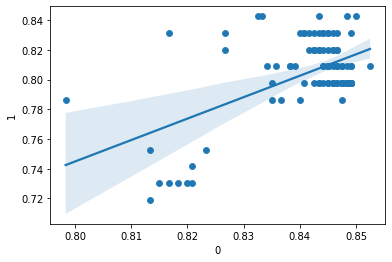

In [292]:
score_boad = pd.DataFrame(score_boad)
sns.scatterplot(x=score_boad.iloc[:, 0], y=score_boad.iloc[:,1])
sns.regplot(x=score_boad.iloc[:, 0], y=score_boad.iloc[:,1])

<AxesSubplot:xlabel='0', ylabel='1'>

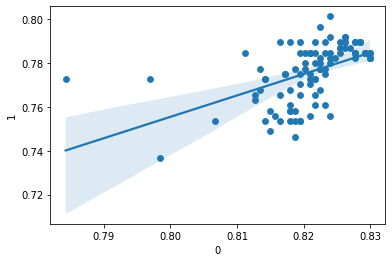

In [220]:
score_boad = pd.DataFrame(score_boad)
sns.scatterplot(x=score_boad.iloc[:, 0], y=score_boad.iloc[:,1])
sns.regplot(x=score_boad.iloc[:, 0], y=score_boad.iloc[:,1])

In [21]:
study.best_params

{'n_estimators': 440,
 'max_depth': 73,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'bootstrap': True,
 'criterion': 'entropy'}

In [120]:
model_rf = RandomForestClassifier(bootstrap=True,
                                  criterion='entropy',
                                  max_depth=50, max_features=6, 
                                  min_samples_leaf=1, 
                                  min_samples_split=10, 
                                  n_estimators=100,
                                  random_state=734)
y_pred_exist = model_rf.fit(X_train, y_train).predict(X_test)
(y_test.values == y_pred_exist).sum() / y_test.shape

array([0.8062201])

In [22]:
model_rf_new = RandomForestClassifier(**study.best_params, random_state=734)
y_pred_new = model_rf_new.fit(X_train, y_train).predict(X_test)
(y_test.values == y_pred_new).sum() / y_test.shape

array([0.80143541])

In [98]:
cross_val_score(model_rf, X_train, y_train, cv=cv, scoring='accuracy').mean()

0.8290484352186885

In [182]:
model_tmp = RandomForestClassifier(
    n_estimators=710,
    max_depth=10, 
    max_features=28,
    min_samples_leaf=5, 
    min_samples_split=11, bootstrap=False, criterion='entropy', random_state=42)
model_tmp.fit(X_train.iloc[:700, :], y_train[:700])
print(accuracy_score(y_train[700:], model_tmp.predict(X_train.iloc[700:,:])))
print(accuracy_score(y_test[:1], model_tmp.predict(X_test.iloc[:1, :])))

0.8571428571428571
1.0


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
n_estimators = [140,145,150,155,160];
max_depth = range(1,10);
criterions = ['gini', 'entropy'];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)


parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
              
        }
grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

In [ ]:
model = RandomForestClassifier()